In [ ]:
import pandas as pd

# Load datasets
rides_df = pd.read_csv('/content/high_route_ridership.csv')
economic_df = pd.read_csv('/content/econ_data.csv')

In [ ]:
print(rides_df.head())

         date  route  rides
0  2008-01-01      3   1079
1  2008-01-02      3   5628
2  2008-01-03      3   5870
3  2008-01-04      3   6059
4  2008-01-05      3   2010


In [ ]:
print(economic_df.head())

        month  gas_price  unemployment
0  1990-08-01     1.2180           4.3
1  1990-09-01     1.2580           4.6
2  1990-10-01     1.3354           4.1
3  1990-11-01     1.3240           4.3
4  1990-12-01     1.3410           4.8


In [ ]:
# Check the unique values or the first few entries in the 'month' column
print(economic_df['month'].head())


0    1990-08-01
1    1990-09-01
2    1990-10-01
3    1990-11-01
4    1990-12-01
Name: month, dtype: object


In [ ]:
# Convert 'date' column in rides_df to datetime
rides_df['date'] = pd.to_datetime(rides_df['date'])

# Display data types to confirm conversion
print("\nRides DataFrame Data Types:")
print(rides_df.dtypes)
print("\nRides DataFrame after conversion:")
print(rides_df.head())



Rides DataFrame Data Types:
date     datetime64[ns]
route             int64
rides             int64
dtype: object

Rides DataFrame after conversion:
        date  route  rides
0 2008-01-01      3   1079
1 2008-01-02      3   5628
2 2008-01-03      3   5870
3 2008-01-04      3   6059
4 2008-01-05      3   2010


In [ ]:
# Convert 'month' column in economic_df to datetime
economic_df['month'] = pd.to_datetime(economic_df['month'])

# Display data types and the first few rows to confirm conversion
print("\nEconomic DataFrame Data Types:")
print(economic_df.dtypes)
print("\nEconomic DataFrame after conversion:")
print(economic_df.head())



Economic DataFrame Data Types:
month           datetime64[ns]
gas_price              float64
unemployment           float64
dtype: object

Economic DataFrame after conversion:
  month  gas_price  unemployment
0   NaT     1.2180           4.3
1   NaT     1.2580           4.6
2   NaT     1.3354           4.1
3   NaT     1.3240           4.3
4   NaT     1.3410           4.8


In [ ]:
import pandas as pd

# Reload the economic dataset
economic_df = pd.read_csv('/content/econ_data.csv')

# Check for the first few rows to inspect the 'month' column
print("Initial Economic DataFrame:")
print(economic_df.head())

# Convert 'month' column to datetime, handling errors
economic_df['month'] = pd.to_datetime(economic_df['month'], errors='coerce', format='%Y-%m-%d')

# Verify the conversion
print("\nEconomic DataFrame Data Types:")
print(economic_df.dtypes)

# Display rows with conversion issues
print("\nRows with conversion issues:")
print(economic_df[economic_df['month'].isna()])


Initial Economic DataFrame:
        month  gas_price  unemployment
0  1990-08-01     1.2180           4.3
1  1990-09-01     1.2580           4.6
2  1990-10-01     1.3354           4.1
3  1990-11-01     1.3240           4.3
4  1990-12-01     1.3410           4.8

Economic DataFrame Data Types:
month           datetime64[ns]
gas_price              float64
unemployment           float64
dtype: object

Rows with conversion issues:
Empty DataFrame
Columns: [month, gas_price, unemployment]
Index: []


In [ ]:
# Set 'month' as index and resample to daily frequency
economic_df = economic_df.set_index('month').resample('D').ffill().reset_index()

# Display the first few rows to verify resampling
print("\nEconomic DataFrame after resampling:")
print(economic_df.head())



Economic DataFrame after resampling:
       month  gas_price  unemployment
0 1990-08-01      1.218           4.3
1 1990-08-02      1.218           4.3
2 1990-08-03      1.218           4.3
3 1990-08-04      1.218           4.3
4 1990-08-05      1.218           4.3


In [ ]:
# Convert 'date' column in rides_df to datetime
rides_df['date'] = pd.to_datetime(rides_df['date'])

# Display data types and the first few rows to confirm conversion
print("\nRides DataFrame Data Types:")
print(rides_df.dtypes)
print("\nRides DataFrame after conversion:")
print(rides_df.head())



Rides DataFrame Data Types:
date     datetime64[ns]
route             int64
rides             int64
dtype: object

Rides DataFrame after conversion:
        date  route  rides
0 2008-01-01      3   1079
1 2008-01-02      3   5628
2 2008-01-03      3   5870
3 2008-01-04      3   6059
4 2008-01-05      3   2010


In [ ]:
# Rename the 'month' column to 'date' in the economic DataFrame
economic_df.rename(columns={'month': 'date'}, inplace=True)

# Display the first few rows of the updated economic DataFrame
print("\nEconomic DataFrame after renaming column:")
print(economic_df.head())



Economic DataFrame after renaming column:
        date  gas_price  unemployment
0 1990-08-01      1.218           4.3
1 1990-08-02      1.218           4.3
2 1990-08-03      1.218           4.3
3 1990-08-04      1.218           4.3
4 1990-08-05      1.218           4.3


In [ ]:
# Merge the rides_df and economic_df DataFrames on the 'date' column
combined_df = pd.merge(rides_df, economic_df, on='date', how='left')

# Display the first few rows of the combined DataFrame
print("\nCombined DataFrame after merging:")
print(combined_df.head())



Combined DataFrame after merging:
        date  route  rides  gas_price  unemployment
0 2008-01-01      3   1079    3.04275           5.6
1 2008-01-02      3   5628    3.04275           5.6
2 2008-01-03      3   5870    3.04275           5.6
3 2008-01-04      3   6059    3.04275           5.6
4 2008-01-05      3   2010    3.04275           5.6


In [ ]:
# Check for missing values in the combined DataFrame
print("\nMissing values in Combined DataFrame:")
print(combined_df.isnull().sum())



Missing values in Combined DataFrame:
date              0
route             0
rides             0
gas_price       290
unemployment    290
dtype: int64


In [ ]:
# Check rows with missing values in the 'gas_price' and 'unemployment' columns
missing_data = combined_df[combined_df['gas_price'].isna() | combined_df['unemployment'].isna()]
print("Rows with missing values:")
print(missing_data.head())


Rows with missing values:
           date  route  rides  gas_price  unemployment
4109 2019-04-02      3   6690        NaN           NaN
4110 2019-04-03      3   6654        NaN           NaN
4111 2019-04-04      3   6453        NaN           NaN
4112 2019-04-05      3   5829        NaN           NaN
4113 2019-04-06      3   2215        NaN           NaN


In [ ]:
# Forward fill missing values
combined_df.fillna(method='ffill', inplace=True)


<ipython-input-20-3e58e15ac557>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


In [ ]:
# Verify that there are no remaining missing values
print("\nMissing values in Combined DataFrame after handling:")
print(combined_df.isnull().sum())



Missing values in Combined DataFrame after handling:
date            0
route           0
rides           0
gas_price       0
unemployment    0
dtype: int64


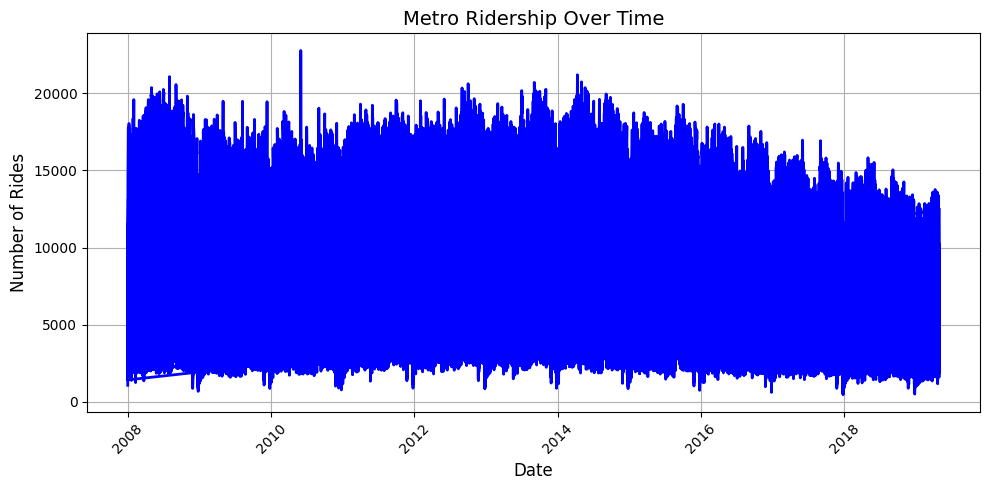

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['rides'], color='blue', linewidth=2)
plt.title('Metro Ridership Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


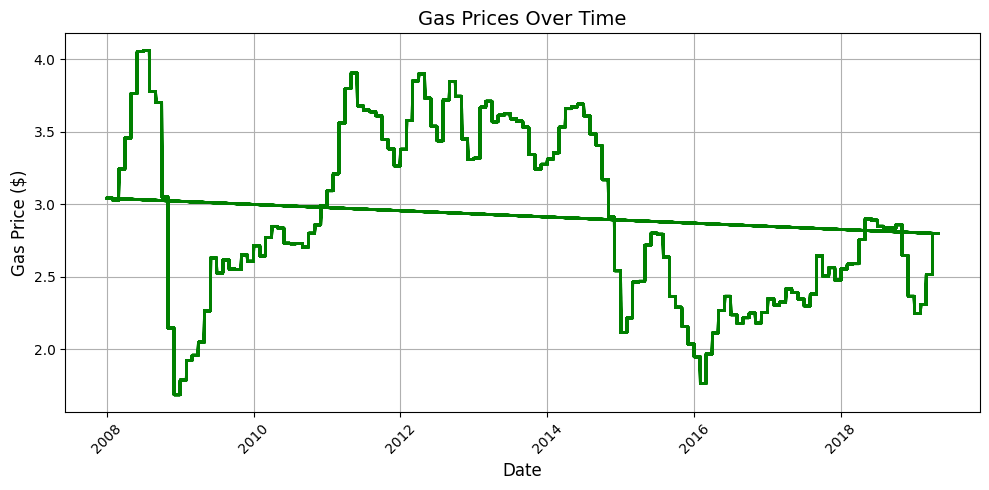

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['gas_price'], color='green', linewidth=2)
plt.title('Gas Prices Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gas Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


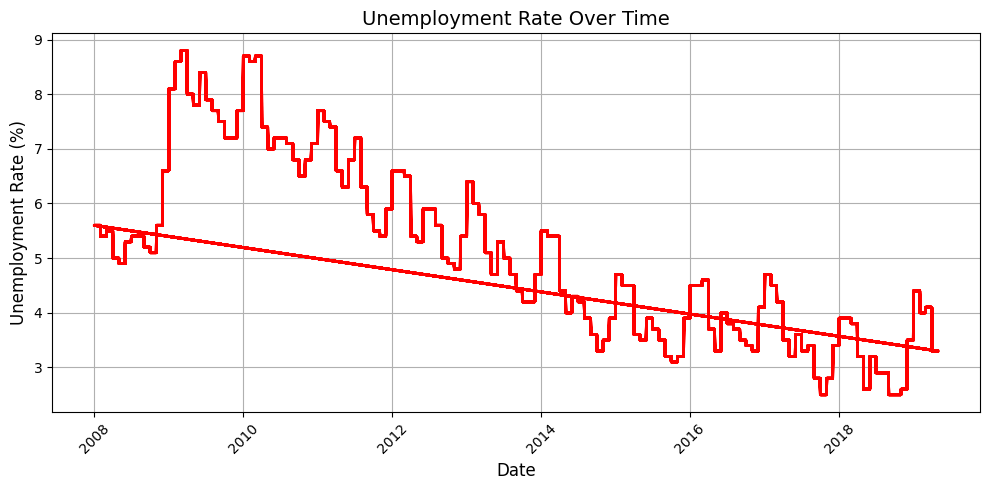

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['unemployment'], color='red', linewidth=2)
plt.title('Unemployment Rate Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


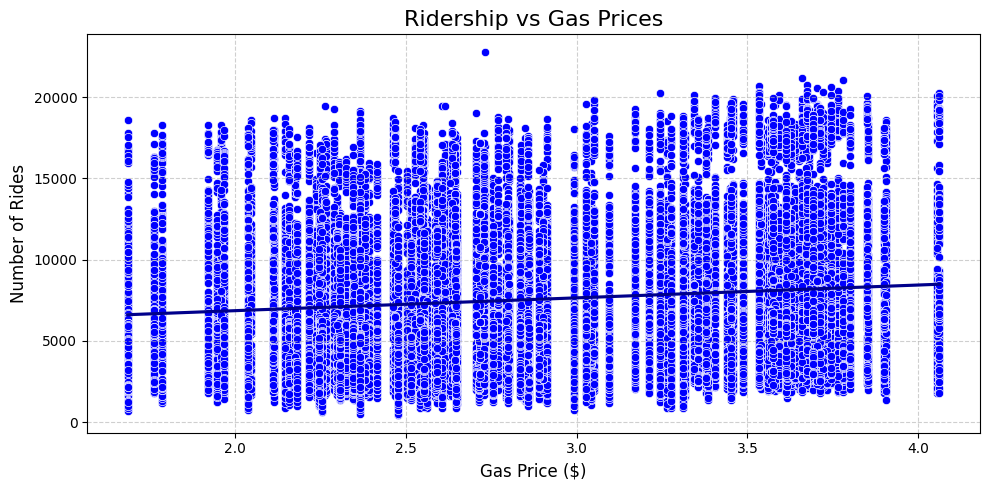

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='gas_price', y='rides', data=combined_df, color='blue')
sns.regplot(x='gas_price', y='rides', data=combined_df, scatter=False, color='darkblue')
plt.title('Ridership vs Gas Prices', fontsize=16)
plt.xlabel('Gas Price ($)', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


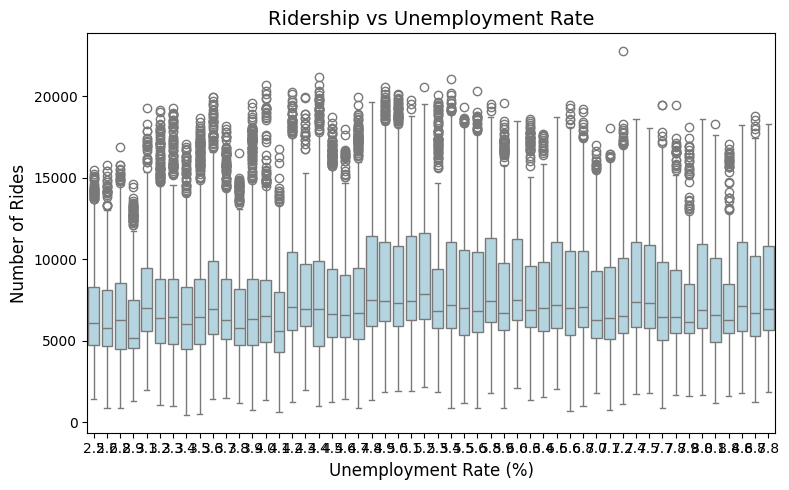

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='unemployment', y='rides', data=combined_df, color='lightblue')
plt.title('Ridership vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.tight_layout()
plt.show()


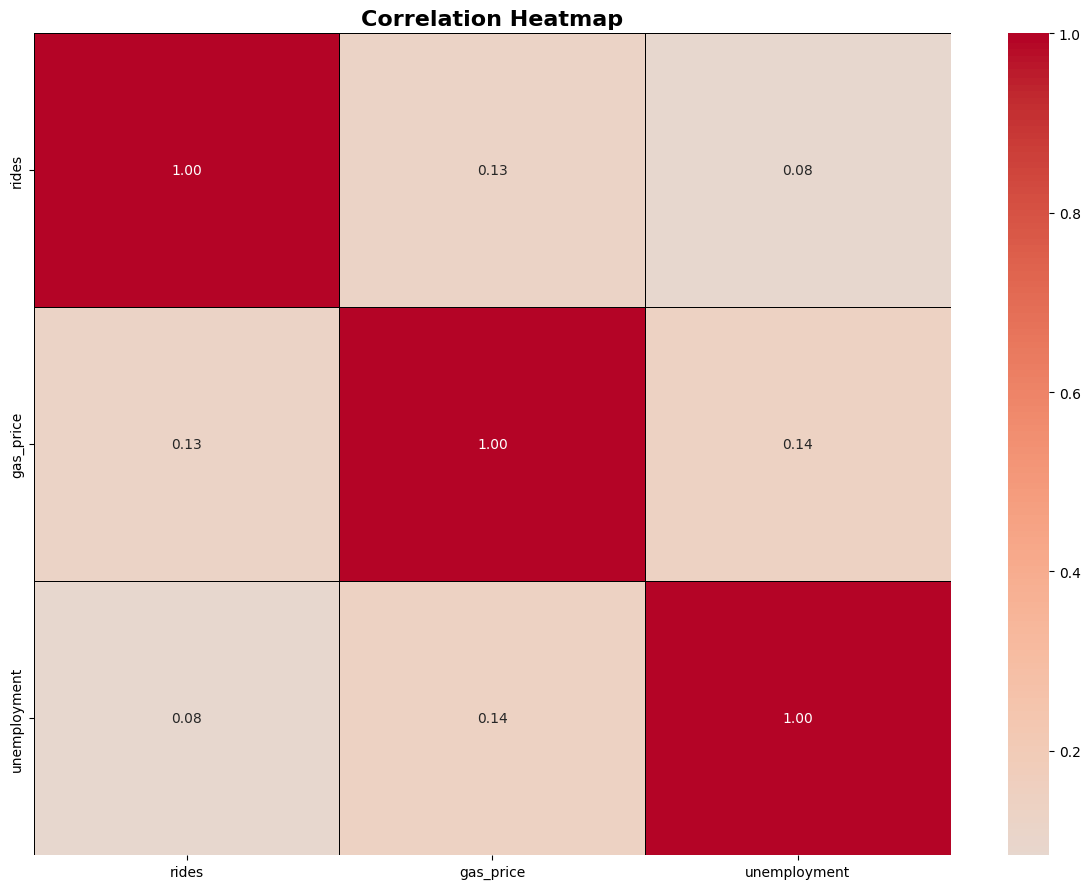

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap for ridership, gas prices, and unemployment
plt.figure(figsize=(12, 9))
sns.heatmap(combined_df[['rides', 'gas_price', 'unemployment']].corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


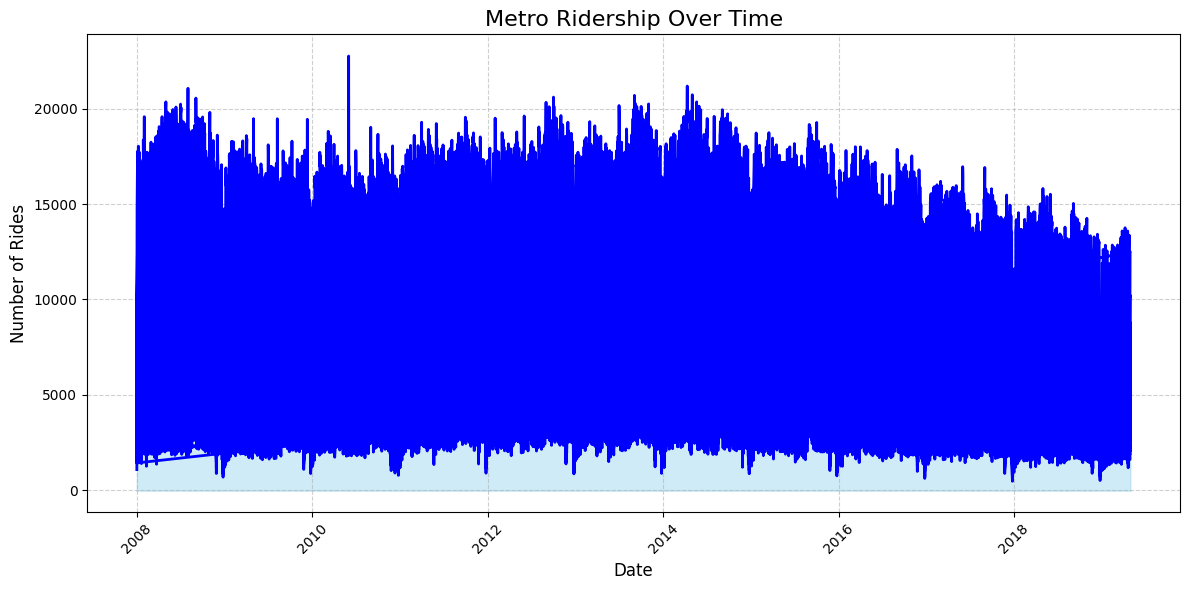

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(combined_df['date'], combined_df['rides'], color='skyblue', alpha=0.4)
plt.plot(combined_df['date'], combined_df['rides'], color='blue', linewidth=2)
plt.title('Metro Ridership Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


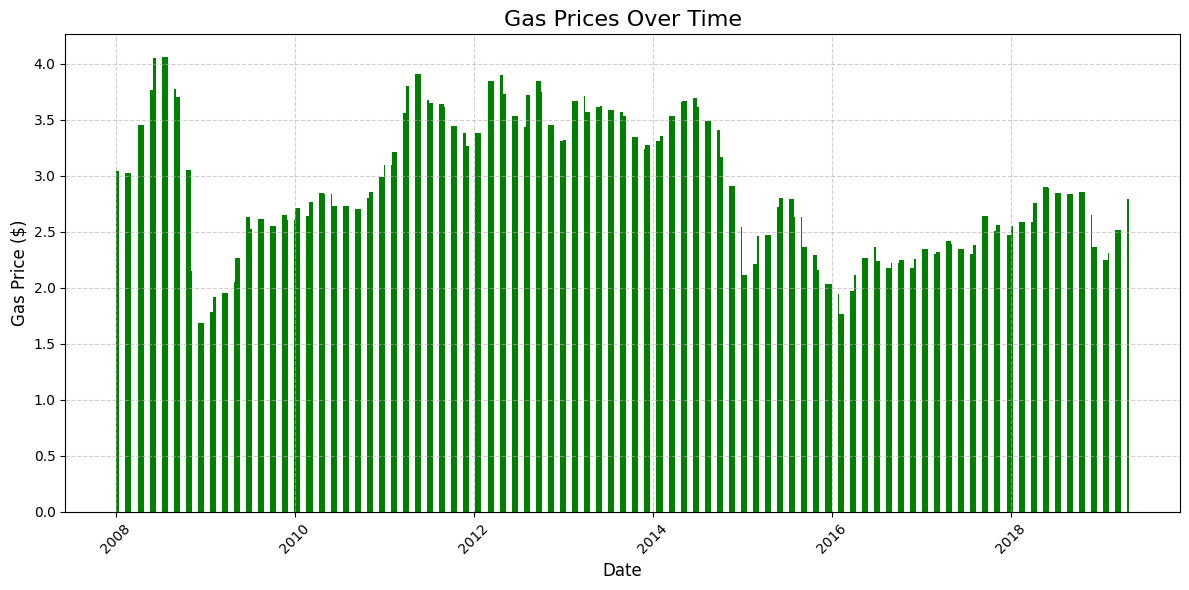

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(combined_df['date'], combined_df['gas_price'], color='green', width=0.5)
plt.title('Gas Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gas Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


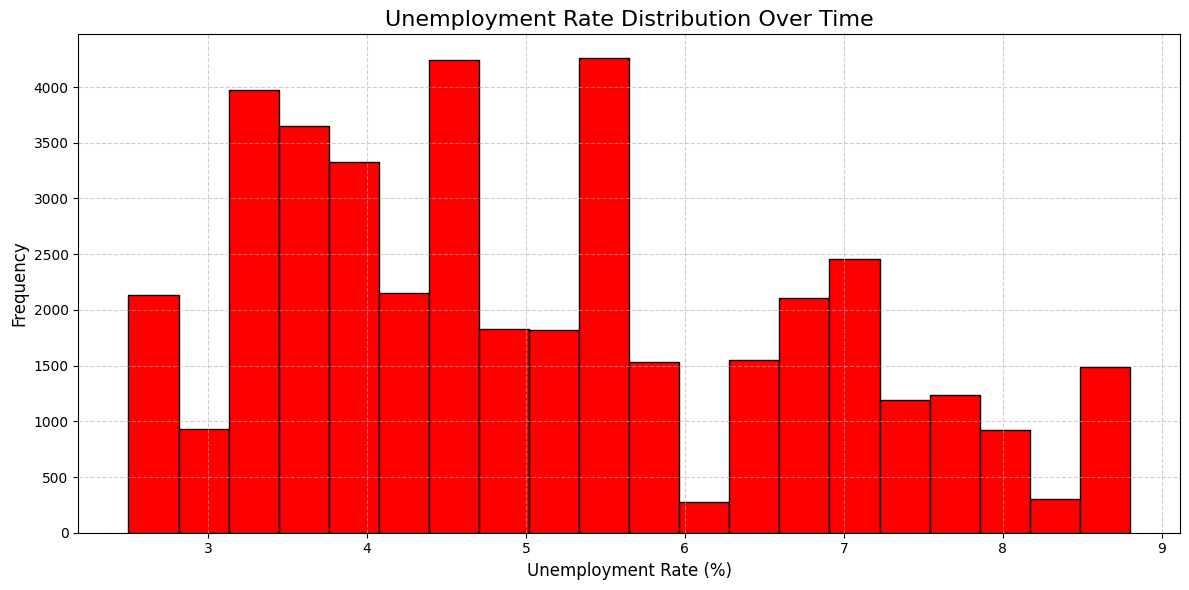

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(combined_df['unemployment'], bins=20, color='red', edgecolor='black')
plt.title('Unemployment Rate Distribution Over Time', fontsize=16)
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
